In [31]:
import warnings
warnings.filterwarnings("ignore")
import os

os.sys.path.insert(0, '../script')

from config import *
from webnlg import *

import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
import logging

logging.basicConfig(level=logging.ERROR, 
                    format='%(asctime)s - %(levelname)s - %(name)s - %(message)s')

In [3]:
# select models I developed
my_models_paths = !ls -d -1 ../data/models/*.txt

my_models_paths

['../data/models/4 - Baseline - Just join triples_c952c4774651e01f72450b3ac8ebcde98ab9f157.txt',
 '../data/models/5 - Model - Template Based - roots_c952c4774651e01f72450b3ac8ebcde98ab9f157.txt']

In [4]:
# adds models submitted to the challenge
models_paths = my_models_paths + SUBMISSIONS_FILEPATHS
models_paths

['../data/models/4 - Baseline - Just join triples_c952c4774651e01f72450b3ac8ebcde98ab9f157.txt',
 '../data/models/5 - Model - Template Based - roots_c952c4774651e01f72450b3ac8ebcde98ab9f157.txt',
 '../data/webnlg2017/submissions/adaptCenter/ADAPTcentreWebNLGsubmission.txt',
 '../data/webnlg2017/submissions/melbourne/final_result.txt',
 '../data/webnlg2017/submissions/pkuwriter/PKUWriter_results.txt',
 '../data/webnlg2017/submissions/tilburg/nmt_test.out.ordered',
 '../data/webnlg2017/submissions/tilburg/smt_test.out.ordered',
 '../data/webnlg2017/submissions/tilburg/template_test.out.ordered',
 '../data/webnlg2017/submissions/uit-danglt-clnlp/Submission-UIT-DANGNT-CLNLP.txt',
 '../data/webnlg2017/submissions/upf/UPF_All_sent_final.txt',
 '../data/webnlg2017/submissions/baseline_sorted.txt']

In [5]:
# loads texts for each model
models_results = {}

for model_path in models_paths:
    
    with open(model_path) as f:
        
        models_results[model_path] = [line[:-1] for line in f]

In [8]:
test_with_lex = WebNLGCorpus.load('test_with_lex')
entries = list(test_with_lex)

In [64]:
import pandas as pd
pd.set_option('max_colwidth', 1000)
from nltk.translate.bleu_score import sentence_bleu

lex = WebNLGCorpus.load("test_with_lex")

from textacy.preprocess import preprocess_text

def preprocess(ref):
    
    ref = preprocess_text(ref, no_accents=True, lowercase=True, no_punct=True)
    
    return ref.split()


def sentence_bleu_for_all_models():
    
    models_names = [model_path.split('/')[-1][:15] for model_path in models_results.keys()]
    models_bleus = [f'bleu_{model_name}' for model_name in models_names]
    entry_infos = ['ntriples', 'category']
    columns = models_names + models_bleus + entry_infos
    
    results = []
    for i, entry in enumerate(entries):
        
        references = [preprocess(ref) for ref in entry.ldf.ltext.tolist()]
        
        result = [model_results[model_path][i] for model_path in models_results.keys()]
        result += [sentence_bleu(references, preprocess(model_results[model_path][i])) for model_path in models_results.keys()]
        result += [entry.edf['ntriples'].values[0], entry.edf['category'].values[0]]
        
        results.append(result)
        
    return pd.DataFrame.from_records(results, columns=columns)

def sentence_bleu_for_all_models_scores_only():
    
    columns = ['model', 'bleu', 'ntriples', 'category']
    
    path_plus_name = list(zip(models_results.keys(), [model_path.split('/')[-1][:15] for model_path in models_results.keys()]))
    
    results = []
    for i, entry in enumerate(entries):
        
        references = [preprocess(ref) for ref in entry.ldf.ltext.tolist()]
        
        for model_path, model_name in path_plus_name:
            
            result = [model_name, sentence_bleu(references, preprocess(models_results[model_path][i])), 
                      entry.edf['ntriples'].values[0], entry.edf['category'].values[0]]
        
            results.append(result)
        
    return pd.DataFrame.from_records(results, columns=columns)

In [65]:
df = sentence_bleu_for_all_models_scores_only()

df.head()

/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order i

/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order i

/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order i

/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order i

/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order i

/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order i

/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order i

/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order i

/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order i

/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order i

/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order i

/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order i

/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order i

/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order i

/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order i

/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order i

/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order i

/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order i

/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order i

/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order i

/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order i

/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order i

/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order i

/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order i

/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order i

/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order i

/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order i

/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order i

/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order i

/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order i

/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order i

/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/abevieiramota/anaconda3/envs/webnlg/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order i

model          bleu  ntriples category
0  4 - Baseline -   5.161215e-78         1  Airport
1  5 - Model - Tem  9.193227e-01         1  Airport
2  ADAPTcentreWebN  9.193227e-01         1  Airport
3  final_result.tx  9.193227e-01         1  Airport
4  PKUWriter_resul  9.193227e-01         1  Airport

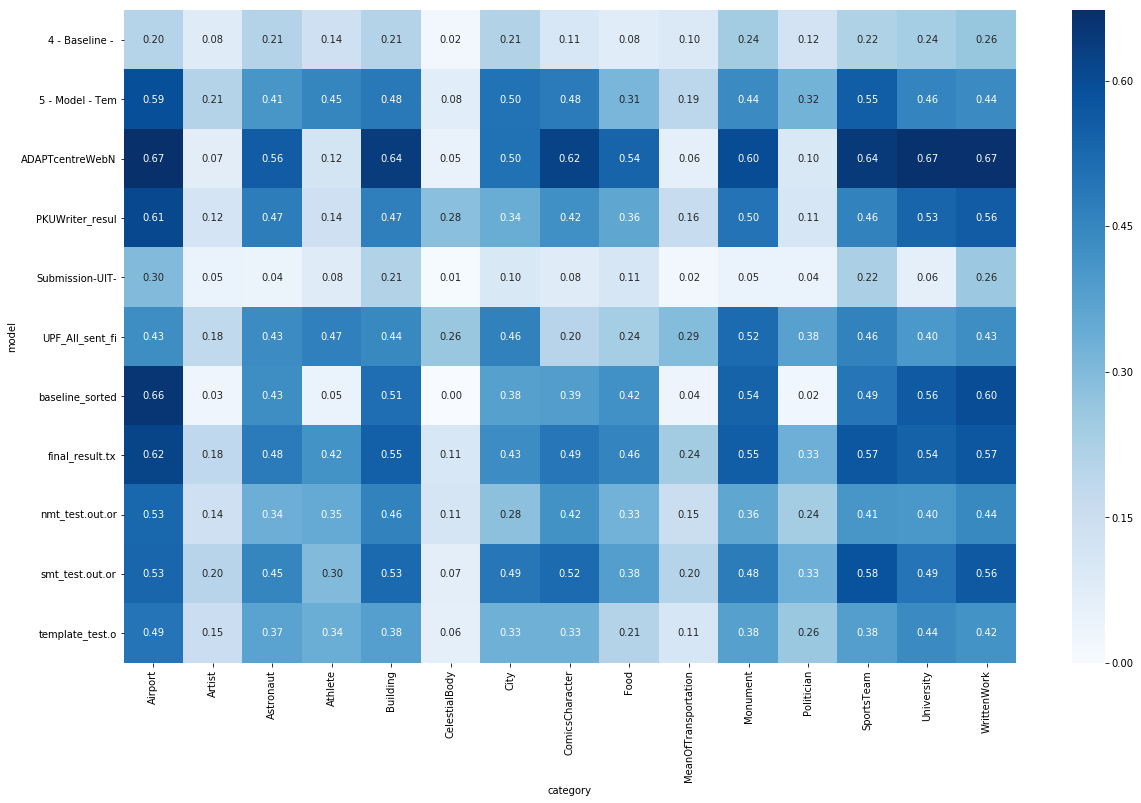

In [66]:
r = df.groupby(['model', 'category']).bleu.mean().unstack().fillna(0)

_, ax = plt.subplots(1, 1, figsize=(20, 12))
sns.heatmap(r, annot=True,
                ax=ax,
                fmt='.2f',
                cmap='Blues')

In [65]:
df = sentence_bleu_for_all_models(models_results)

# Some statistics

In [141]:
models_names = [model_path.split('/')[-1][:15] for model_path in models_results.keys()]

df.head().reset_index().set_index(['index'] + models_names)

bleu_4 - Baseline -   \
index 4 - Baseline -                                                                                                         5 - Model - Tem                                                                                                              ADAPTcentreWebN                                                                                                                     final_result.tx                                                                                                               PKUWriter_resul                                                                                                                   nmt_test.out.or                                                                                                                     smt_test.out.or                                                                                                                   template_test.o                                                                                                                       Submission-UIT-                                                                                                                                   UPF_All_sent_fi                                                                                                           baseline_sorted                                                                                                                                           
0     Abilene Regional Airport city Served Abilene, Texas                                                                    Abilene Regional Airport serves the city of Abilene, Texas.                                                                  abilene regional airport serves the city of abilene , texas .                                                                       abilene regional airport serves the city of abilene, texas .                                                                  abilene regional airport serves the city of abilene , texas .                                                                     abilene regional airport serves the city of abilene .                                                                               abilene regional airport serves the city of abilene                                                                               abilene regional airport serves abilene                                                                                               abilene , texas is a city which is served by abilene regional airport .                                                                           the abilene regional airport serves abilene ( texas ) .                                                                   abilene regional airport serves the city of abilene , texas .                                                                              5.161215e-78   
1     Adolfo Suárez Madrid–Barajas Airport location Madrid, Paracuellos de Jarama, San Sebastián de los Reyes and Alcobendas Adolfo Suárez Madrid–Barajas Airport is located in Madrid, Paracuellos de Jarama, San Sebastián de los Reyes and Alcobendas. adolfo suárez madrid – barajas airport can be found in madrid , paracuellos de jarama , san sebastián de los reyes and alcobendas . adolfo suárez madrid–barajas airport is located in madrid, paracuellos de jarama, san sebastián de los reyes and alcobendas . adolfo suárez madrid – barajas airport is located in madrid , paracuellos de jarama , san sebastián de los reyes and alcobendas . adolfo suárez madrid -- barajas airport is located at madrid , paracuellos de jarama , san sebastián de los reyes and alcobendas .  adolfo suárez madrid -- barajas airport is located in madrid , paracuellos de jarama , san sebastián de los reyes and alcobendas  madrid , paracuellos de jarama , san sebastian de los reyes and alcobendas is the location of adolfo suarez madrid-barajas airport .  the adolfo suárez madrid – b

In [ ]:
df.groupby()

In [133]:
# Lets group our results by some buckets of sentence_bleu and look if there is some pattern
def make_heatmap(model_name):

    r = df.groupby([pd.cut(df[f'bleu_{model_name}'], [-1., .5, 1.]), 'ntriples', 'category']).size().unstack().fillna(0)

    _, ax = plt.subplots(1, 1, figsize=(20, 12))
    sns.heatmap(r.T, annot=True,
                    ax=ax,
                    fmt='.0f',
                    cmap='Blues')

In [129]:
['make_heatmap(\'{}\')'.format(model_path.split('/')[-1][:15]) for model_path in models_results.keys()]

["make_heatmap('4 - Baseline - ')",
 "make_heatmap('5 - Model - Tem')",
 "make_heatmap('ADAPTcentreWebN')",
 "make_heatmap('final_result.tx')",
 "make_heatmap('PKUWriter_resul')",
 "make_heatmap('nmt_test.out.or')",
 "make_heatmap('smt_test.out.or')",
 "make_heatmap('template_test.o')",
 "make_heatmap('Submission-UIT-')",
 "make_heatmap('UPF_All_sent_fi')",
 "make_heatmap('baseline_sorted')"]

# Baseline

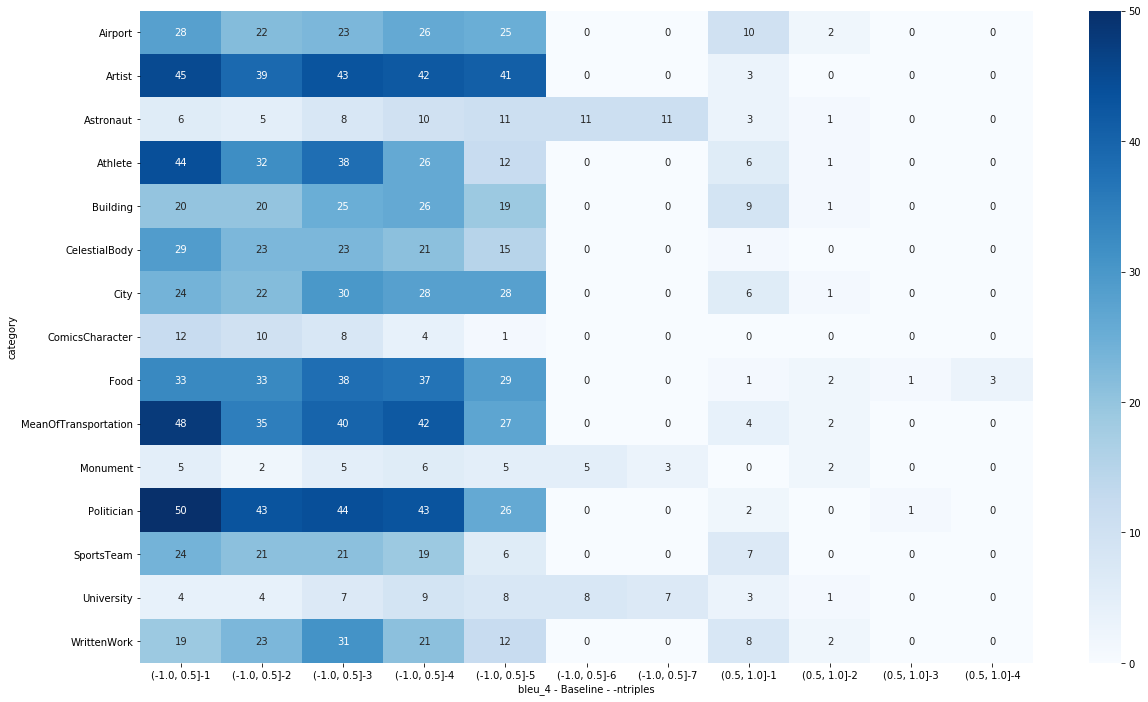

In [134]:
make_heatmap('4 - Baseline - ')

# Current Model

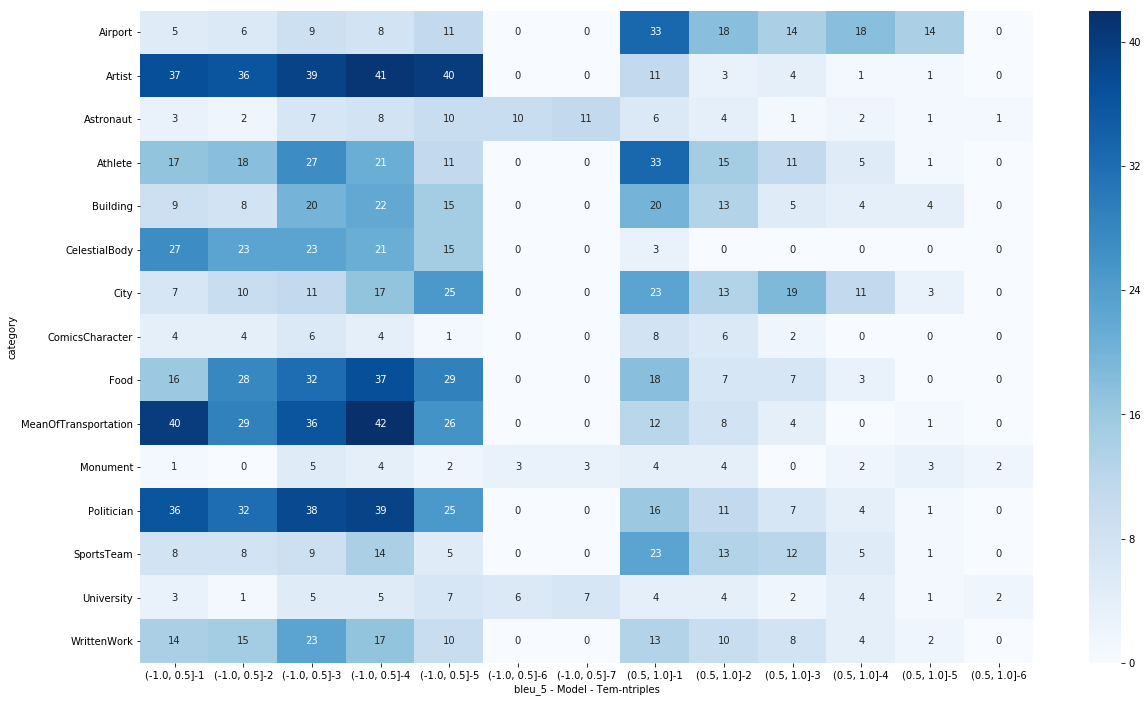

In [135]:
make_heatmap('5 - Model - Tem')

# PKUWriter

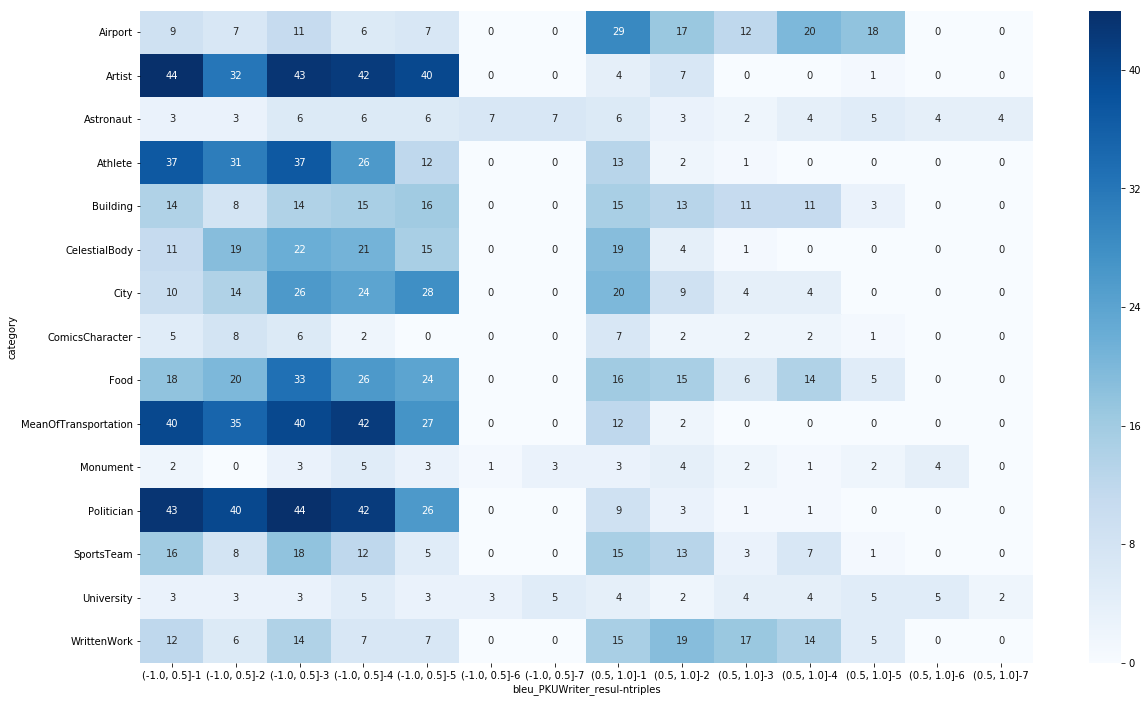

In [136]:
make_heatmap('PKUWriter_resul')

# NMT

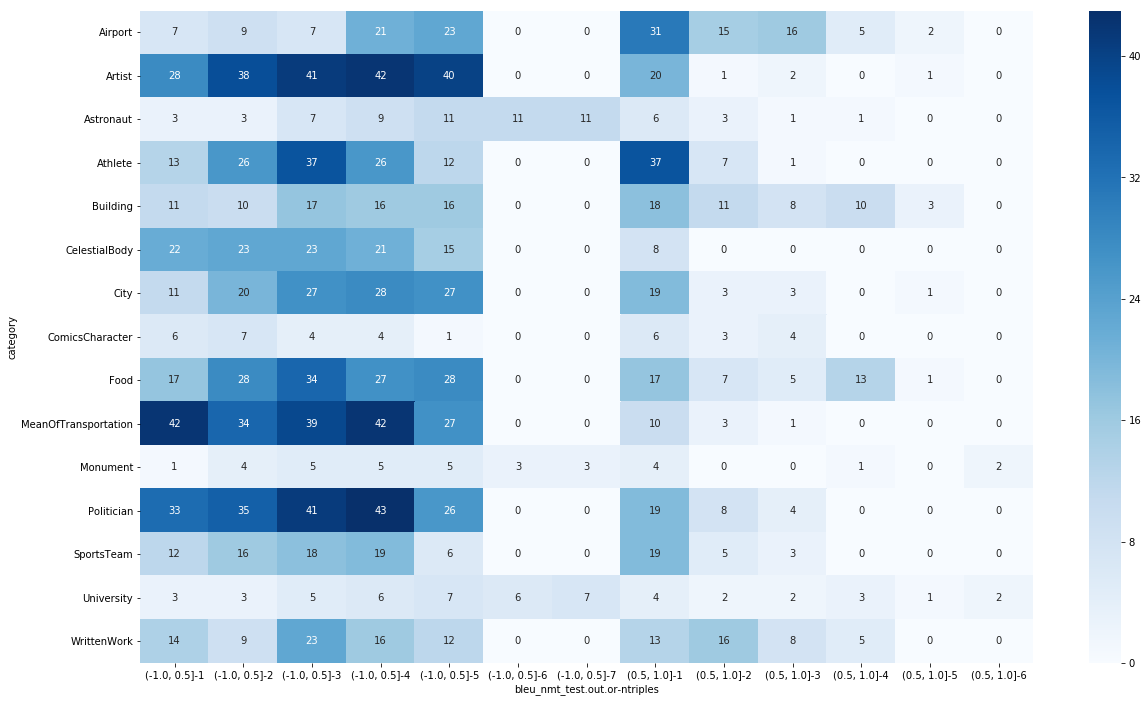

In [137]:
make_heatmap('nmt_test.out.or')

# SMT

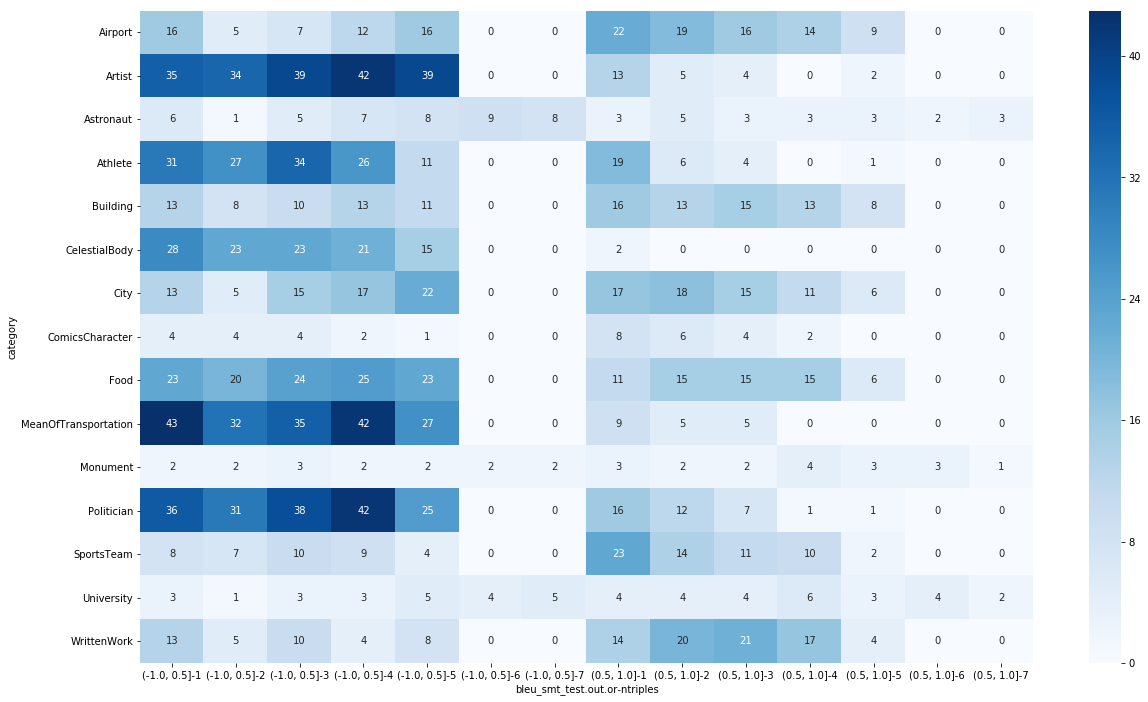

In [138]:
make_heatmap('smt_test.out.or')

In [ ]:
# It looks like all of above models got very bad scores at categories

In [53]:
#for row in df.nsmallest(5, 'bleu_5 - Model - Tem')[['bleu_5 - Model - Tem', '5 - Model - Tem']].itertuples():
for row in df.nlargest(5, 'bleu_5 - Model - Tem')[['bleu_5 - Model - Tem', '5 - Model - Tem']].itertuples():
#for row in df.sample(5)[['bleu_5 - Model - Tem', '5 - Model - Tem']].itertuples():
    
    e = entries[row[0]]
    
    print(f'{e}\n')
    
    print(f'bleu = [{row[1]}]\n')
    
    
    print(f'lexicalization = \n{row[2]}\n')

Triple info: {'category': 'Airport', 'eid': 'Id2', 'idx': '0_1', 'ntriples': 1}

	Modified triples:

Adolfo_Suárez_Madrid–Barajas_Airport | location | "Madrid, Paracuellos de Jarama, San Sebastián de los Reyes and Alcobendas"


	Lexicalizations:

Adolfo Suárez Madrid–Barajas Airport can be found in Madrid, Paracuellos de Jarama, San Sebastián de los Reyes and Alcobendas.
Adolfo Suarez Madrid-Barajas airport is located at Madrid, Paracuellos de Jarama, San Sebastián de los Reyes and Alcobendas.
Adolfo Suarez Madrid-Barajas Airport is located in Madrid, Paracuellos de Jarama, San Sebastian de los Reyes and Alcobendas.

bleu = [1.0]

lexicalization = 
Adolfo Suárez Madrid–Barajas Airport is located in Madrid, Paracuellos de Jarama, San Sebastián de los Reyes and Alcobendas.

Triple info: {'category': 'Airport', 'eid': 'Id5', 'idx': '0_4', 'ntriples': 1}

	Modified triples:

Afonso_Pena_International_Airport | cityServed | Curitiba


	Lexicalizations:

Afonso Pena International Airport ser